In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('customer_churn.csv')

# missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Label Encoding for binary categorical variables 
from sklearn.preprocessing import LabelEncoder
label_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category columns 
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)




X = df.drop(columns=['customerID', 'Churn']) 
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile 
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Training 
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate 
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))


Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6180 - loss: 30.3053 - val_accuracy: 0.7957 - val_loss: 2.2316
Epoch 2/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.7099 - loss: 2.2526 - val_accuracy: 0.8085 - val_loss: 1.3299
Epoch 3/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.7362 - loss: 1.7876 - val_accuracy: 0.7986 - val_loss: 0.5240
Epoch 4/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.7389 - loss: 1.4008 - val_accuracy: 0.3787 - val_loss: 8.5007
Epoch 5/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7261 - loss: 2.0777 - val_accuracy: 0.8028 - val_loss: 0.7272
Epoch 6/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.7538 - loss: 0.8987 - val_accuracy: 0.5504 - val_loss: 1.5610
Epoch 7/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7505 - loss: 1.4521 - val_accuracy: 0.8071 - val_loss: 1.1405
Epoch 8/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7634 - loss: 1.4312 - val

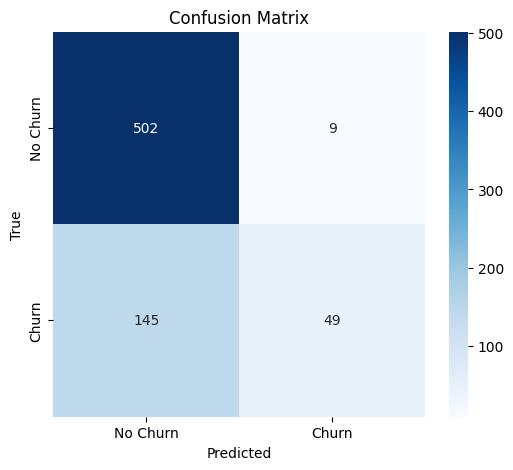

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

# confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
